<a href="https://colab.research.google.com/github/mispasyuk/test_task/blob/main/task3and4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

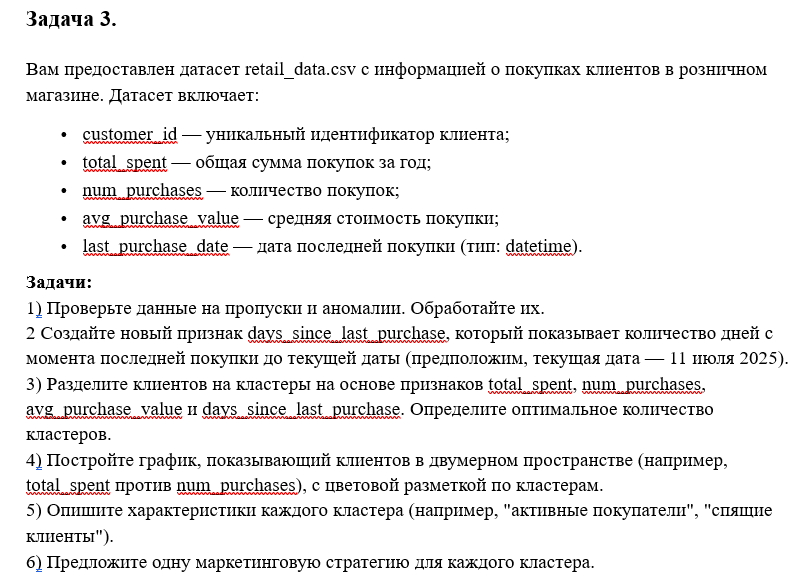

In [ ]:
import pandas as pd
retail_data = pd.read_csv('retail_data.csv')
retail_data.head()

,customer_id,total_spent,num_purchases,avg_purchase_value,last_purchase_date
0,1,1149.01,49,23.45,2025-06-15
1,2,958.52,20,47.93,2025-07-05
2,3,1194.31,12,99.53,2025-06-20
3,4,1456.91,15,97.13,2025-07-07
4,5,929.75,18,51.65,2025-06-22


Проанализируем данные в датасете с помощью AutoML

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=16c7e18b4ae73d4c7f7d3b544917ce3e20e5c35549631c528ac9d4748346e336
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(retail_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 72.04it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В колонках total_spent и avg_purchase_value есть отрицательные значения. Это видно и по статистике, и по графикам в отчете Pandas Profiling Report. Так как данные признаки (total_spent и avg_purchase_value) подразумевают неотрицательные значения, то значения меньше 0 считаем аномалиями, которые нужно обработать.

Посмотрим на данные аномалии

In [ ]:
retail_data[retail_data['total_spent'] < 0]

,customer_id,total_spent,num_purchases,avg_purchase_value,last_purchase_date
64,65,-1243.76,45,27.64,2025-06-15
156,157,-1559.73,34,45.87,2025-07-06
195,196,-1115.60,14,79.69,2025-07-05
258,259,-1133.15,14,80.94,2025-07-10
319,320,-960.96,19,50.58,2025-07-06
382,383,-362.83,42,8.64,2025-06-25
392,393,-603.93,17,35.53,2025-07-02
497,498,-942.90,11,85.72,2025-06-27
500,501,-292.62,4,73.15,2025-02-08
544,545,-47.16,2,-23.58,2025-04-28


In [ ]:
retail_data[retail_data['avg_purchase_value'] < 0]

,customer_id,total_spent,num_purchases,avg_purchase_value,last_purchase_date
544,545,-47.16,2,-23.58,2025-04-28
566,567,-3.81,3,-1.27,2025-03-28
575,576,-21.11,3,-7.04,2025-01-18
646,647,-69.69,4,-17.42,2025-01-16
668,669,-65.10,2,-32.55,2025-06-10
671,672,NaN,2,-3.67,2025-01-19
708,709,-8.19,3,-2.73,2025-02-08


В колонке total_spent также есть NaN значения, заполним аномалии и пропуски средним значением колонки (которое считается без аномалий).

In [ ]:
mean_total = retail_data['total_spent'].loc[retail_data['total_spent'] > 0].mean()
mean_avg = retail_data['avg_purchase_value'].loc[retail_data['avg_purchase_value'] > 0].mean()
retail_data['total_spent'] = retail_data['total_spent'].where(retail_data['total_spent'] >= 0, mean_total)
retail_data['avg_purchase_value'] = retail_data['avg_purchase_value'].where(retail_data['avg_purchase_value'] >= 0, mean_avg)

In [ ]:
retail_data.dtypes

,0
customer_id,int64
total_spent,float64
num_purchases,int64
avg_purchase_value,float64
last_purchase_date,object


In [ ]:
current_date = pd.Timestamp('2025-07-11')
retail_data['days_since_last_purchase'] = (current_date - pd.to_datetime(retail_data['last_purchase_date'])).dt.days
retail_data.head()

,customer_id,total_spent,num_purchases,avg_purchase_value,last_purchase_date,days_since_last_purchase
0,1,1149.01,49,23.45,2025-06-15,26
1,2,958.52,20,47.93,2025-07-05,6
2,3,1194.31,12,99.53,2025-06-20,21
3,4,1456.91,15,97.13,2025-07-07,4
4,5,929.75,18,51.65,2025-06-22,19


In [ ]:
X = retail_data.drop(['customer_id', 'last_purchase_date'], axis = 1)

In [ ]:
from sklearn.cluster import KMeans
model_clst = KMeans(n_clusters = 3)
model_clst.fit(X)
labels = model_clst.labels_

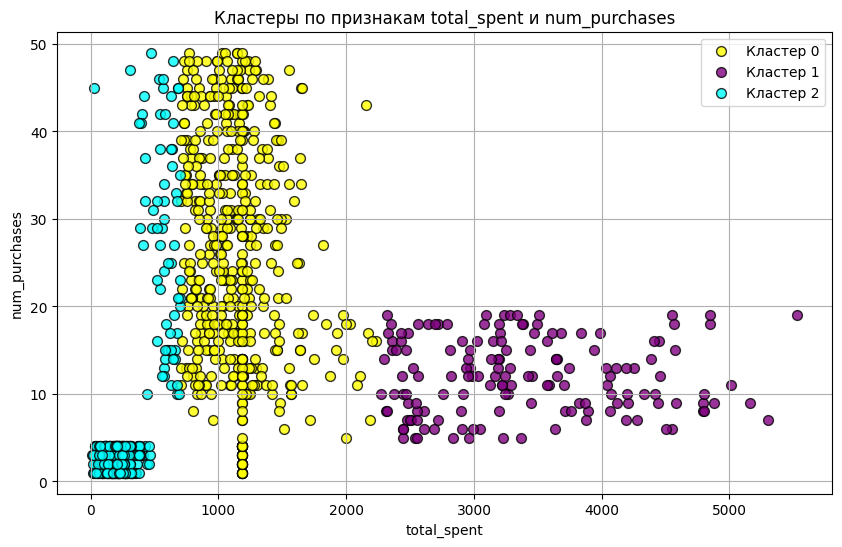

In [ ]:
import matplotlib.pyplot as plt
colors = ['yellow', 'purple', 'cyan']  # Цвета для кластеров 0, 1, 2

plt.figure(figsize=(10, 6))
for cluster in np.unique(labels):
  mask = labels == cluster
  plt.scatter(X.loc[mask, 'total_spent'], X.loc[mask, 'num_purchases'], color=colors[cluster], label=f'Кластер {cluster}', s=50, alpha=0.8, edgecolor='k')

plt.title('Кластеры по признакам total_spent и num_purchases')
plt.xlabel('total_spent')
plt.ylabel('num_purchases')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим на качество кластеризации

In [ ]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {score:.4f}")

Davies-Bouldin Index: 0.4382


Также посмотрим, что будет после понижения размерности признаков до 2 (метод PCA)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

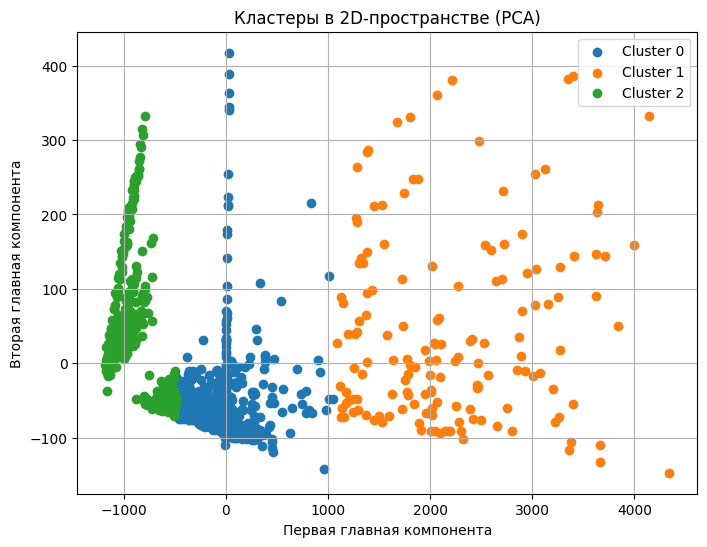

In [ ]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], label=f'Cluster {label}')

plt.title('Кластеры в 2D-пространстве (PCA)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим на статистику по каждому кластеру

In [ ]:
import numpy as np
retail_data['cluster'] = labels
cluster_stats = retail_data.groupby('cluster').agg({
    'total_spent': ['mean', 'median', 'min', 'max'],
    'num_purchases': ['mean', 'median', 'min', 'max'],
    'avg_purchase_value': ['mean', 'median', 'min', 'max']})
print(cluster_stats)
cluster_stats = retail_data.groupby('cluster').agg({'days_since_last_purchase': ['mean', 'median', 'min', 'max']
})
print(cluster_stats)

         total_spent                             num_purchases                 \
                mean    median      min      max          mean median min max   
cluster                                                                         
0        1133.322776  1142.025   704.28  2232.20     25.797244   24.5   1  49   
1        3381.921373  3234.210  2269.07  5526.93     12.026144   12.0   5  19   
2         277.255457   232.610    12.92   702.84      7.678466    3.0   1  49   

        avg_purchase_value                           
                      mean   median     min     max  
cluster                                              
0                63.389991   41.815    8.64  550.56  
1               322.578693  285.450  122.00  758.42  
2                90.640029   64.860    0.61  375.48  
        days_since_last_purchase                
                            mean median min  max
cluster                                         
0                      22.163386   17.0   

#Кластер 0 (желтый цвет на графике с кластерами по признакам)

Клиенты в этом кластере совершают много покупок , но средняя стоимость покупок небольшая. Большинство покупателей сделали покупки недавно (медиана дней с момента последней покупки — 17). Это группа активных покупателей, которые часто совершают небольшие покупки.

Маркетинговая стратегия:
- Персонализированные рекомендации: показывать товары, которые соответствуют их предпочтениям и истории покупок.
- Регулярные акции и скидки: предлагать специальные предложения, чтобы поддерживать их активность.
- Бонусная программа: создать программу лояльности, где клиенты получают бонусы за каждую покупку.
- Электронные напоминания: отправлять электронные письма или push-уведомления о новых продуктах или акциях.

#Кластер 1 (фиолетовый цвет)

Клиенты в этом кластере имеют средние затраты на покупки, но их количество меньше, чем у активных покупателей (кластер 0). Однако, средняя стоимость покупок выше. Эти клиенты также довольно активны, так как большинство сделали покупки не так давно (медиана дней с момента последней покупки — 32). Это группа среднезатратных покупателей, которые совершают покупки реже, но тратят на товары больше денег.

Маркетинговая стратегия :
- Персонализированные предложения: рекомендовать более дорогие товары, которые соответствуют их потребностям.
- Премиальные предложения: создать премиальную категорию товаров с дополнительными преимуществами (может быть быстрая доставка).
- Личный менеджер: предоставить персонального менеджера для обслуживания этих клиентов.
- Напоминания о повторной покупке: отправлять напоминания о повторной покупке популярных продуктов.

#Кластер 2 (голубой цвет)

Клиенты в этом кластере имеют низкие затраты на покупки, небольшое количество покупок и низкую среднюю стоимость покупок. Кроме того, они значительно реже совершают покупки (медиана дней с момента последней покупки — 84). Это группа неактивных и малоактивных покупателей, которые либо потеряли интерес к магазину, либо временно не нуждаются в товарах.

Маркетинговая стратегия:
- Восстановление взаимодействия: отправить электронное письмо с особыми предложениями или подарочными сертификатами.
- Специальные акции: предложить эксклюзивные скидки или бесплатную доставку для тех, кто вернется в магазин.
- Интересные новости: отправлять электронные письма с новыми продуктами или статьями, связанными с интересами покупателей.
- Реферальная программа: предложить бонусы за привлечение новых клиентов или друзей.

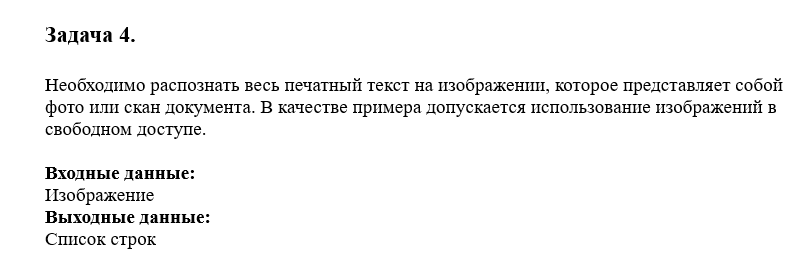

In [ ]:
!pip install pytesseract

Пример 1

In [ ]:
import cv2
import pytesseract

img = cv2.imread('/content/hq720.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

text = pytesseract.image_to_string(thresh, lang='eng')
print(text)

HEALTH

Health is very important for every person. Everybody wants to be

healthy and active. But in spite of that a lot of people nowadays
have different illnesses and other health problems. | take care of my health
because | like to feel well. But sometimes it seems that everyone all around
me is ill, so it’s vary easy to get sick. Sometimes I'm tired or stressed and |
have a headache. So | have to use an aspirin or some other pain killer.
| don't like to go to the doctor, but sometimes | have to. | go to the dentist
once a year, because it's important to look after your teeth. | hate toothache
and can’t understand people who are ready to tolerate it because they are
scared to go to the dentist,
In my opinion people should try to keep fit, eat healthy food and do some
sports. But even if you do all that, it doesn’t guarantee that you won't have
some serious disease like asthma or cancer. The reason of it is a high level

of pollution of the environment.
Ss Youu)

TCH LOTS OF ENGLISH 

Пример 2

In [ ]:
img = cv2.imread('/content/image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
=
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

text = pytesseract.image_to_string(thresh, lang='eng')
print(text)

hey you.

‘yes, you. stop being unhappy with yourself. you are perfect.
slop wishing you looked like someone else or wishing people
liked you as much as they like someone else, stop trying to get
attention from those who hurt you. stop hating your body, your

face, your personality, your quirks. love them. without those

things you wouldn't be you, and why would you want to be

anyone else? be confident with who you are. smile. i°U draw

people in. ifanyone hates on you because you are happy with
yourself then you stick your middle finger in the air and say
screw it. my happiness will not depend on others anymore.

i'm happy because i love who i am. ilove my flaws. ilove my

imperfections. they make me me. and ‘me’ is pretty amazing.



Пример 3

In [ ]:
img = cv2.imread('/content/image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

text = pytesseract.image_to_string(thresh, lang='eng')
print(text)

MY NATIVE CITY

Native city or town is a place where
you were born and lived in childhood. My
native city is one of the most beautiful
cities in the world, the second largest city
in Russia. Saint Petersburg is situated on
the coast of the Baltic Sea, the River Neva
flows through the city. Russian Tsar Peter
the Great was a founder of this city. About
two hundred years Saint Petersburg was a
capital of the Russian Empire.

My city is one of the biggest cities of the
Russian Federation. Its population is about
five million inhabitants. It is a cultural
center and an important trade port. Saint Petersburg is the
northernmost city in the world with a population more over
than million people. It is an important economic, scientific and
cultural center of Russia and a huge transport hub. Historical
center of the city with its architectural ensembles, monuments
and museums is included in the List of World Heritage by UNESCO list.
Saint Petersburg has one of the largest collections of paintin